<a href="https://colab.research.google.com/github/millyazhukovich/machine_learning2024/blob/Zhukovich/%D0%A2%D0%B5%D1%81%D1%82%D0%BE%D0%B2%D0%B0%D1%8F_%D0%B2%D1%8B%D0%B1%D0%BE%D1%80%D0%BA%D0%B0.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
from sklearn.linear_model import LogisticRegression
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
data = pd.read_csv('diabetes.csv')
data

Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                       0.351   31        0  
2                       0.672   32        1  
3                       0.167   21        0  
4                       2.288   33        1  
..                        ...  ...      ...  
763                     0.171   63        0  
764                     0.340   27        0  
765                     0.245   30        0  
766                     0.349   47        1  
767                     0.315   23        0  

[768 rows x 9 columns]

In [6]:
df_binary = data[data['Outcome'].isin([0, 1])]

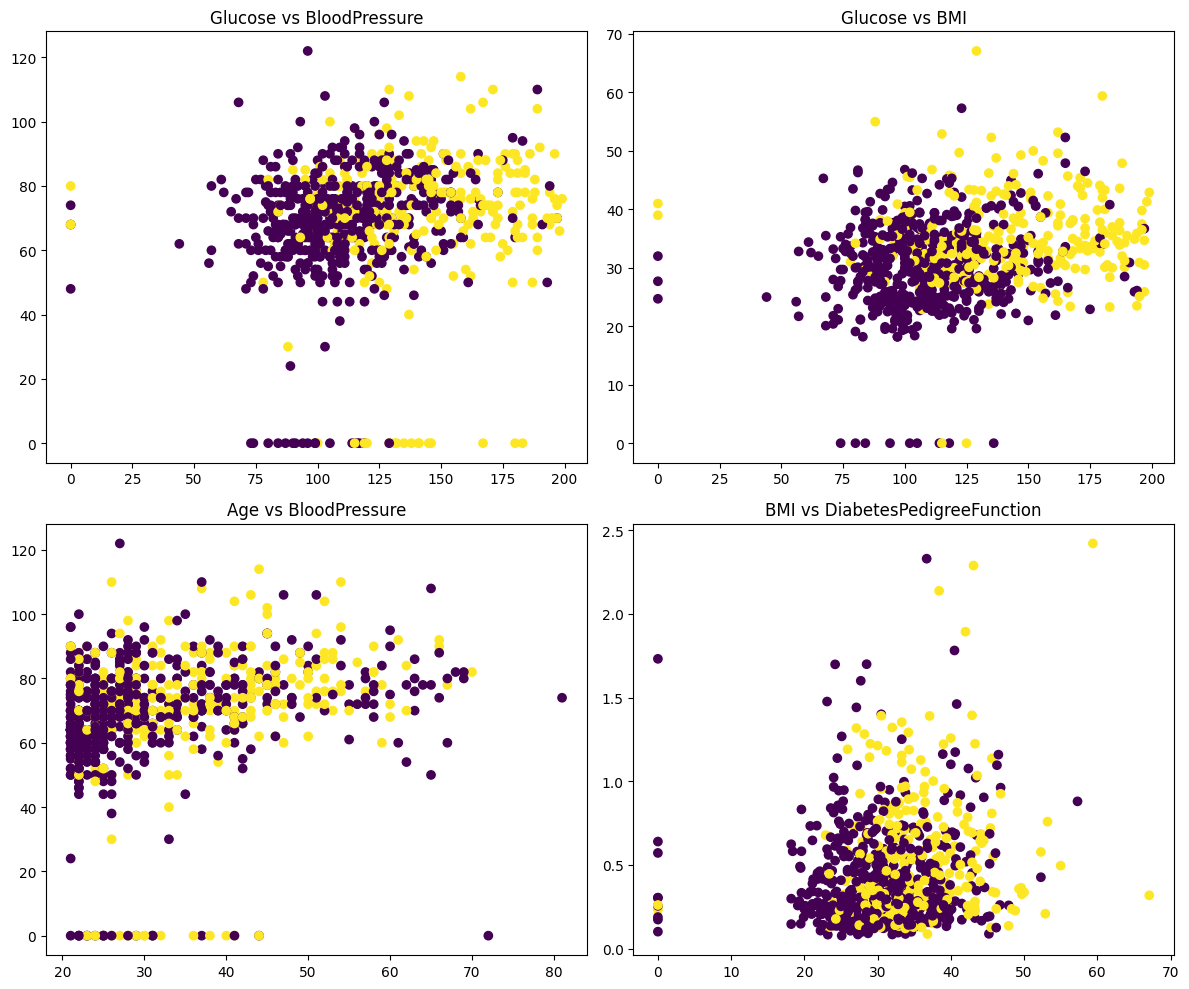

In [10]:
fig, axs = plt.subplots(2, 2, figsize=(12, 10))
axs[0, 0].scatter(df_binary['Glucose'], df_binary['BloodPressure'], c=df_binary['Outcome'])
axs[0, 0].set_title('Glucose vs BloodPressure')
axs[1, 1].scatter(df_binary['BMI'], df_binary['DiabetesPedigreeFunction'], c=df_binary['Outcome'])
axs[1, 1].set_title('BMI vs DiabetesPedigreeFunction')
axs[0, 1].scatter(df_binary['Glucose'], df_binary['BMI'], c=df_binary['Outcome'])
axs[0, 1].set_title('Glucose vs BMI')
axs[1, 0].scatter(df_binary['Age'], df_binary['BloodPressure'], c=df_binary['Outcome'])
axs[1, 0].set_title('Age vs BloodPressure')

plt.tight_layout()
plt.show()

In [11]:
X_binary = df_binary.drop(columns='Outcome')
y_binary = df_binary['Outcome']

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X_binary, y_binary, test_size=0.2, random_state=1)



In [16]:
model = LogisticRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
class_report = classification_report(y_test, y_pred)
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
print("Classification Report:\n", class_report)
print("\nAccuracy Score:", accuracy)

Classification Report:
               precision    recall  f1-score   support

           0       0.79      0.90      0.84        99
           1       0.76      0.56      0.65        55

    accuracy                           0.78       154
   macro avg       0.77      0.73      0.74       154
weighted avg       0.78      0.78      0.77       154


Accuracy Score: 0.7792207792207793


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


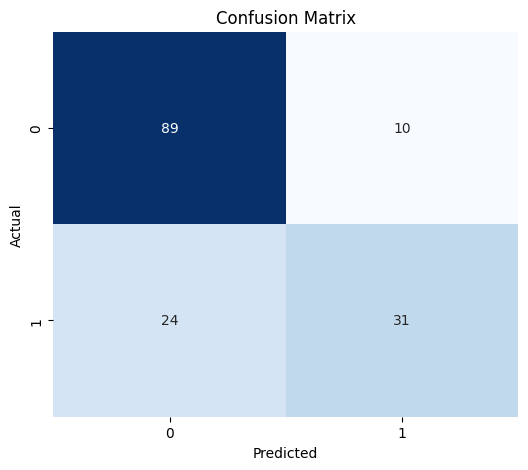

In [17]:
plt.figure(figsize=(6, 5))
sns.heatmap(conf_matrix, annot=True, fmt="d", cbar=False, cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.show()

1. Матрица ошибок (Confusion Matrix):
Класс 0 (отсутствие диабета):
Модель правильно классифицировала 89 из 99 образцов (значение в верхнем левом углу).
Ошибочно классифицировано как класс 1 — 10 раз (значение в верхнем правом углу).
Класс 1 (наличие диабета):
Модель правильно классифицировала 31 из 55 образцов (значение в нижнем правом углу).
Ошибочно классифицировано как класс 0 — 24 раза (значение в нижнем левом углу).
Это показывает, что модель лучше определяет отсутствие диабета (класс 0), чем его наличие (класс 1).

2. Точность (Precision):
Для класса 0 — 79%: из всех предсказанных случаев отсутствия диабета, 79% были правильными.
Для класса 1 — 76%: из всех предсказанных случаев наличия диабета, 76% были правильными.
Вывод: Точность для обоих классов примерно одинакова, но для класса 0 она немного выше.

3. Полнота (Recall):
Для класса 0 — 90%: из всех реальных случаев отсутствия диабета, модель правильно предсказала 90%.
Для класса 1 — 56%: из всех реальных случаев наличия диабета, модель правильно предсказала только 56%.
Вывод: Полнота для класса 1 заметно ниже, чем для класса 0. Это значит, что модель часто не распознает случаи наличия диабета.

4. F1-мера (F1-score):
Для класса 0 — 0.84: высокая F1-мера показывает сбалансированность точности и полноты для этого класса.
Для класса 1 — 0.65: более низкое значение F1-меры говорит о том, что модель менее эффективно распознает этот класс.
5. Общая точность (Accuracy):
Общая точность модели составляет 78%, то есть модель правильно классифицировала 78% всех примеров в тестовой выборке.

Заключение:
Модель лучше определяет отсутствие диабета, чем его наличие. Она демонстрирует высокую точность и полноту для класса 0, но страдает от низкой полноты для класса 1, что приводит к тому, что многие случаи диабета остаются непризнанными. Это может быть связано с дисбалансом классов или недостаточностью признаков для точного определения диабета.